In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *

In [36]:
folder = 'LowResProduction/R8Zsol/'
folder = 'GasGravity/R4/'
# folder = 'SummitData/Production2pc/Fiducial/'
folder = 'SummitData/GasGravity/Production2pc/R4/'
# folder = 'LowResProduction/R4Zsol/'

In [37]:
# data_path = os.path.join(scratch, 'sims/', folder)
data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
os.chdir(data_path)
list_file = glob.glob("proj_y_*")

In [38]:
infile   = os.path.join(data_path, 'metal_uniform.in')
# infile   = os.path.join(data_path, 'metal_uniform_512.in')
dom_min, dom_max, ncells = getdomain(infile)
fac = 1
zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
dy = (dom_max[1]- dom_min[1])/(fac*int(ncells[1]))
dz = (dom_max[2]- dom_min[2])/(fac*int(ncells[2]))
dV = dx * dy * dz

In [39]:
timestep = np.zeros(len(list_file))
tot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
hot_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
warm_mass_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

tot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
hot_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
warm_scalar_flux = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

In [40]:
i = 0 
for f in list_file:
    inputfile = os.path.join(data_path, f)
    ds   = yt.load(inputfile)
    data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
    timestep[i] = ds.current_time.to('Myr')
    tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]
    hot_mass_flux[i,:] = np.array(data['hot_mass_outflow'])[:,0,:]
    warm_mass_flux[i,:] = np.array(data['warm_mass_outflow'])[:,0,:]
    
    
    tot_scalar_flux[i] = np.array(data['scalar_outflow'])[:,0,:]
    hot_scalar_flux[i] = np.array(data['hot_scalar_outflow'])[:,0,:]
    warm_scalar_flux[i] = np.array(data['warm_scalar_outflow'])[:,0,:]
    i+=1

yt : [INFO     ] 2024-07-20 09:49:39,492 Parameters: current_time              = 214909373151609.47
yt : [INFO     ] 2024-07-20 09:49:39,493 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-20 09:49:39,494 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-20 09:49:39,495 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-20 09:49:40,612 Parameters: current_time              = 507810616152567.0
yt : [INFO     ] 2024-07-20 09:49:40,613 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-20 09:49:40,615 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-20 09:49:40,616 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-20 09:49:42,049 Parameters: current_time              = 327808348215316.1
yt : [INFO     ] 2024-07-20 09:49:42

yt : [INFO     ] 2024-07-20 09:50:06,908 Parameters: current_time              = 104538632744860.16
yt : [INFO     ] 2024-07-20 09:50:06,909 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-20 09:50:06,910 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-20 09:50:06,912 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-20 09:50:07,981 Parameters: current_time              = 73376651252329.56
yt : [INFO     ] 2024-07-20 09:50:07,982 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-20 09:50:07,983 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-20 09:50:07,984 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-20 09:50:09,056 Parameters: current_time              = 177470803467919.88
yt : [INFO     ] 2024-07-20 09:50:0

yt : [INFO     ] 2024-07-20 09:50:33,451 Parameters: current_time              = 336959365103705.2
yt : [INFO     ] 2024-07-20 09:50:33,452 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-20 09:50:33,454 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-20 09:50:33,455 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-20 09:50:34,919 Parameters: current_time              = 159221847249194.34
yt : [INFO     ] 2024-07-20 09:50:34,920 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-07-20 09:50:34,922 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-07-20 09:50:34,923 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-07-20 09:50:36,019 Parameters: current_time              = 204993316234752.94
yt : [INFO     ] 2024-07-20 09:50:3

In [41]:
np.amax(timestep)

16.343814245346074

In [42]:
total_flux    = dx *np.sum(tot_mass_flux, axis=1)
hotmass_flux  = dx *np.sum(hot_mass_flux, axis=1)
warmmass_flux = dx *np.sum(warm_mass_flux, axis=1)

scaltot_flux    = dx *np.sum(tot_scalar_flux, axis=1)
hotscal_flux  = dx *np.sum(hot_scalar_flux, axis=1)
warmscal_flux = dx *np.sum(warm_scalar_flux, axis=1)

(0.0, 200.0)

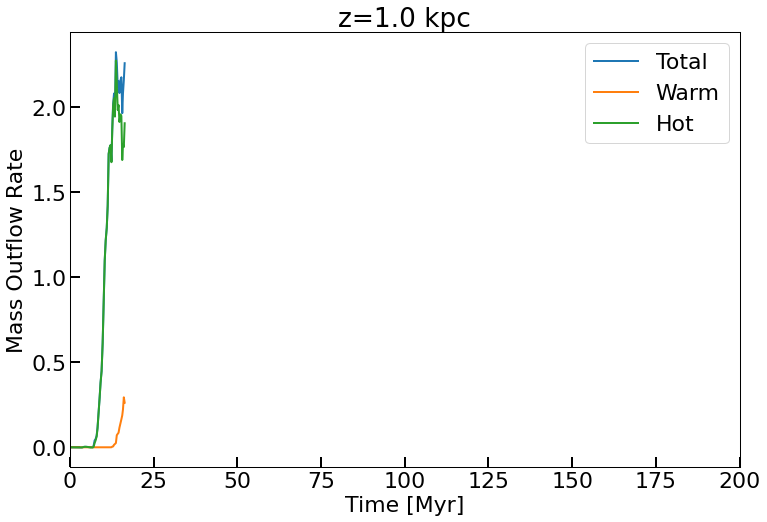

In [43]:

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
munit =  yr_to_sec/Msun/1.e-2
height = 1. * kpc
index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
listarr = [total_flux[:,index], warmmass_flux[:,index], hotmass_flux[:,index], ]
label = ['Total', 'Warm', 'Hot']
i = 0
for arr in listarr:
    tt = timestep 
    indexes = list(range(len(tt)))
    indexes.sort(key=tt.__getitem__)
    sorted_time = list(map(tt.__getitem__, indexes))
    sorted_mdot  = list(map(arr.__getitem__, indexes))
    ax.plot(sorted_time, np.asarray(sorted_mdot)*munit, '-', label=label[i],markersize=12, lw=2.)
    i+=1


ax.legend()
ax.set_title('z=%.1f'%(zrange[index]/kpc) + ' kpc')
# ax.set_yscale('log')
# ax.set_ylim(1.e-3,1.e1)
ax.set_ylabel("Mass Outflow Rate")
ax.set_xlabel('Time [Myr]')
ax.set_xlim(0.0,200.)

In [17]:
1043426640739960.8/Myr

33.12465526158606

(0.0, 200.0)

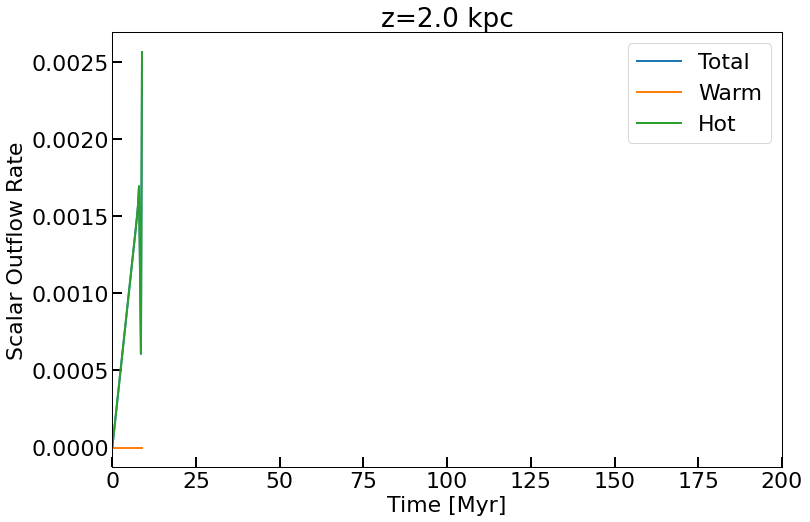

In [44]:

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
Zunit = yr_to_sec/1.e3/1.e-5
height = 2. * kpc
index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
listarr = [scaltot_flux[:,index],warmscal_flux[:,index], hotscal_flux[:,index]]
label = ['Total', 'Warm', 'Hot']
i = 0
for arr in listarr:
    tt = timestep 
    indexes = list(range(len(tt)))
    indexes.sort(key=tt.__getitem__)
    sorted_time = list(map(tt.__getitem__, indexes))
    sorted_mdot  = list(map(arr.__getitem__, indexes))
    ax.plot(sorted_time, np.abs(sorted_mdot)*Zunit, '-', label=label[i],markersize=12, lw=2.)
    i+=1


ax.legend()
ax.set_title('z=%.1f'%(zrange[index]/kpc) + ' kpc')
# ax.set_yscale('log')
# ax.set_ylim(1.e-3,1.e1)
ax.set_ylabel("Scalar Outflow Rate")
ax.set_xlabel('Time [Myr]')
ax.set_xlim(0.0,200.)